In [4]:
 #Imports file

from google.colab import files
uploaded = files.upload()

Saving train.csv to train (1).csv


In [5]:
#Importing the pandas library to work with dataframes

import pandas as pd
df = pd.read_csv("train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df.info()
df.describe()
df.columns  # column names

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [12]:
# helps you identify columns with missing values
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [16]:
# Fill missing Age values with the median
df["Age"].fillna(df["Age"].median(), inplace=True)
# Using loc to avoid the chained assignment warning
df.loc[:, "Age"] = df["Age"].fillna(df["Age"].median())

# Check if 'Cabin' column exists before dropping
if 'Cabin' in df.columns:
    # Drop the Cabin column (since it has too many missing values)
    df.drop(columns=["Cabin"], inplace=True)
else:
    print("Cabin column not found in the DataFrame.")

Cabin column not found in the DataFrame.


<ipython-input-16-e0fa703a03e6>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Age"].fillna(df["Age"].median(), inplace=True)


In [22]:
# Check for duplicates
df.duplicated().sum()

# Remove duplicate rows
df.drop_duplicates(inplace=True)


In [18]:
df["Survived"] = df["Survived"].astype("category")
df["Pclass"] = df["Pclass"].astype("category")


In [19]:
df.columns = df.columns.str.lower()


In [23]:
df.to_csv("titanic_cleaned.csv", index=False)


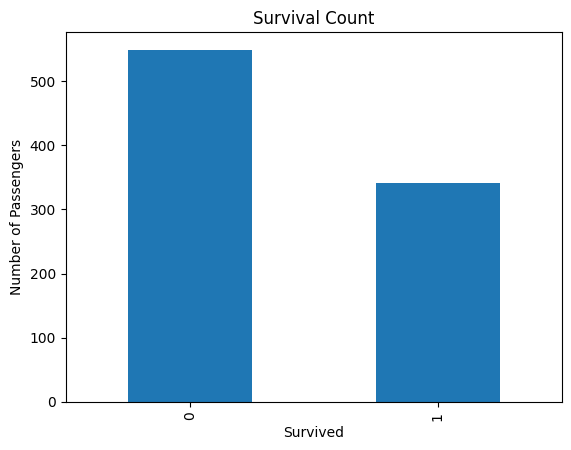

In [24]:
import matplotlib.pyplot as plt

df["survived"].value_counts().plot(kind="bar")
plt.title("Survival Count")
plt.xlabel("Survived")
plt.ylabel("Number of Passengers")
plt.show()


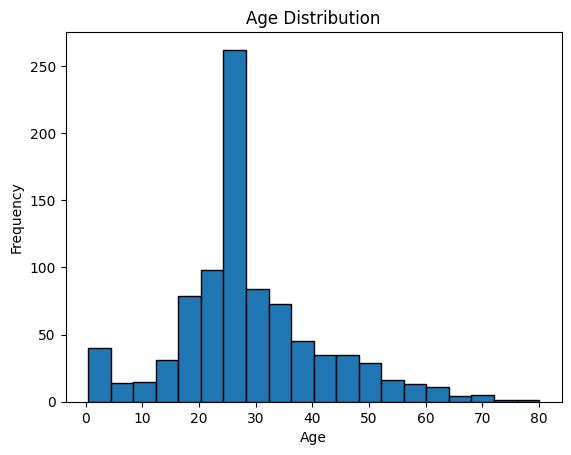

In [25]:
df["age"].plot(kind="hist", bins=20, edgecolor="black")
plt.title("Age Distribution")
plt.xlabel("Age")
plt.show()


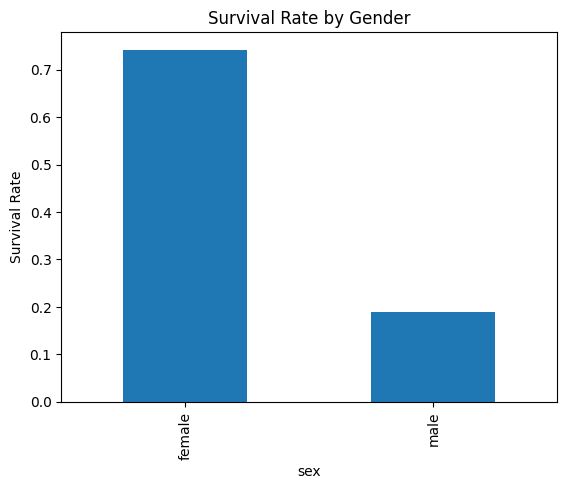

In [29]:
df.groupby("sex")["survived"].apply(lambda x: x.astype(int).mean()).plot(kind="bar") # Cast to int within apply for computing mean
plt.title("Survival Rate by Gender")
plt.ylabel("Survival Rate")
plt.show()